# Linear Regression
### Goal of Lesson
- Learn about linear regression
- Understand difference from discrete classifier
- Understand it is supervised learning task
- Get insight into how similar a linear classifier is to discrete classifier
- Hands-on experience with linear regression

### What is Linear Regression?
- Supervised learning task of learning a mapping from input point to a continuous value

### Linear Classifier
- $h(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2$

### Differently
- Weight vector $w: (w_0, w_1, w_2)$
- Input vector $x: (1, x_1, x_2)$
- Function ([dot-product](https://en.wikipedia.org/wiki/Dot_product)): $x\cdot w: w_0 + w_1 x_1 + w_2 x_2$
- $h_w(x) = w\cdot x$

### In general
- Weight vector $w: (w_0, w_1, \dots, w_n)$
- Input vector $x: (1, x_1, \dots, x_n)$
- Function ([dot-product](https://en.wikipedia.org/wiki/Dot_product)): $x\cdot w: w_0 + w_1 x_1 + \cdots + w_n x_n$
- $h_w(x) = w\cdot x$

### Measure accuracy
- Before we measured classification (right or wrong)
- Now we measure discrete values
- We will use r-squared ([wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination))

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - [**isnull()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) Detect missing values
>     - [**sum()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) Return the sum of the values over the requested axis (can sum number of True-statements).
>     - [**corr()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) compute pairwise correlation of columns
>     - [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from [**sklearn**](https://scikit-learn.org/stable/)
>     - [**LinearRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to train (fit) the model
>     - [**metrics.r2_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) to get the accuracy of the predictions

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv('files/house_prices.csv')
data.head()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


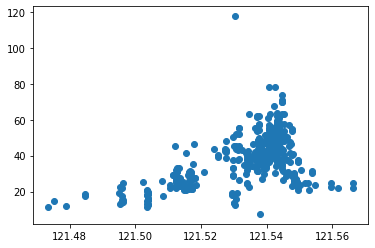

In [68]:
fig, ax = plt.subplots()

ax.scatter(x=data['Longitude'], y=data['House unit price'])

In [69]:
data.corr()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
Transaction,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance to MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House unit price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [70]:
data.isnull().sum()

Transaction                     0
House age                       0
Distance to MRT station         0
Number of convenience stores    0
Latitude                        0
Longitude                       0
House unit price                0
dtype: int64

In [71]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.15)

In [73]:
print(X_train.shape)
print(X_test.shape)

(351, 6)
(63, 6)


In [74]:
print(y_train.shape)
print(y_test.shape)

(351,)
(63,)


In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_test)

In [77]:
mean_absolute_error(y_test, y_pred)

5.3768943250686405

In [78]:
lin.coef_

array([ 4.67857744e+00, -2.58421926e-01, -4.28607244e-03,  1.21784177e+00,
        2.23558483e+02, -1.45002564e+00])

In [79]:
test = [[2013.333,24.0,4527.687,0,24.94741,121.49628]]

In [80]:
y_pred = model.predict(test)

In [81]:
print(y_pred)

[12.78125498]


In [93]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict

from numpy import mean
from numpy import absolute
from numpy import sqrt

In [86]:
#define cross-validation method to use
cv = KFold(n_splits=10)

In [90]:
#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [91]:
#view mean absolute error
mean(absolute(scores))

6.194338372529247

In [ ]:
# Leave One Out

In [94]:
#define cross-validation method to use
cv = LeaveOneOut()


#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [95]:
#view mean absolute error
mean(absolute(scores))

6.238431403537032

In [ ]:
### See the Regression metrics section of the user guide for further details. 

#metrics.explained_variance_score(y_true, ...)
#metrics.max_error(y_true, y_pred)
#metrics.mean_absolute_error(y_true, y_pred, *)
#metrics.mean_squared_error(y_true, y_pred, *)
#metrics.mean_squared_log_error(y_true, y_pred, *)
#metrics.median_absolute_error(y_true, y_pred, *)
#metrics.mean_absolute_percentage_error(...)
#metrics.r2_score(y_true, y_pred, *[, ...]) (coefficient of determination) 
#metrics.mean_poisson_deviance(y_true, y_pred, *)
#metrics.mean_gamma_deviance(y_true, y_pred, *)
#metrics.mean_tweedie_deviance(y_true, y_pred, *)
#metrics.d2_tweedie_score(y_true, y_pred, *)
#metrics.mean_pinball_loss(y_true, y_pred, *)
###